In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_iris

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./DataFiles/RegularSeasonDetailedResults.csv')

data = pd.DataFrame(data)

In [3]:
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [4]:
data.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [5]:
data['WProb'] = 0.0

In [6]:
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WProb
0,2003,10,1104,68,1328,62,N,0,27,58,...,16,22,10,22,8,18,9,2,20,0.0
1,2003,10,1272,70,1393,63,N,0,26,62,...,9,20,20,25,7,12,8,6,16,0.0
2,2003,11,1266,73,1437,61,N,0,24,58,...,14,23,31,22,9,12,2,5,23,0.0
3,2003,11,1296,56,1457,50,N,0,18,38,...,8,15,17,20,9,19,4,3,23,0.0
4,2003,11,1400,77,1208,71,N,0,30,61,...,17,27,21,15,12,10,7,1,14,0.0


In [7]:
y = data['WProb']
features = ['WTeamID','LTeamID','WScore','LScore', 'WOR', 'WDR','LOR', 'LDR']

In [8]:
start_2014 = data.loc[data['Season'] == 2014]

In [9]:
#create two rows for win and loss (1,0), instead of WTeam/ Lteam it will be Team/Opp

In [10]:
team_opp = pd.DataFrame

In [11]:
X = data[features]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
ss = StandardScaler()

In [13]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [14]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=5)

Train on 57477 samples, validate on 19159 samples
Epoch 1/5
57477/57477 [==============================] - 4s 63us/step - loss: 0.0779 - acc: 0.9794 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 2/5
57477/57477 [==============================] - 4s 68us/step - loss: 6.8098e-04 - acc: 1.0000 - val_loss: 2.5577e-04 - val_acc: 1.0000
Epoch 3/5
57477/57477 [==============================] - 4s 68us/step - loss: 1.3800e-04 - acc: 1.0000 - val_loss: 6.8060e-05 - val_acc: 1.0000
Epoch 4/5
57477/57477 [==============================] - 4s 69us/step - loss: 3.9813e-05 - acc: 1.0000 - val_loss: 2.1460e-05 - val_acc: 1.0000
Epoch 5/5
57477/57477 [==============================] - 4s 66us/step - loss: 1.2979e-05 - acc: 1.0000 - val_loss: 7.2626e-06 - val_acc: 1.0000


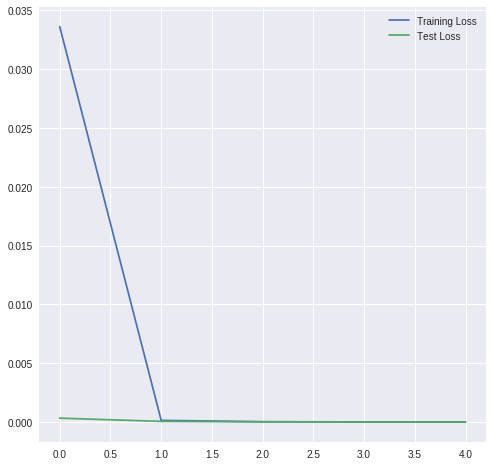

In [70]:
plt.figure(figsize=(8, 8))
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.legend()

In [77]:
preds = model.predict_proba(X_test_scaled)
len(preds)

19159

In [78]:
submission = pd.read_csv('SampleSubmissionStage1.csv')
submission.head()

,ID,Pred
0,2014_1107_1110,0.5
1,2014_1107_1112,0.5
2,2014_1107_1113,0.5
3,2014_1107_1124,0.5
4,2014_1107_1140,0.5


In [74]:
submission.Pred = preds
submission.head()

ValueError: Length of values does not match length of index